In [2]:
import sys 
import pathlib
import os
import numpy as np
import pandas as pd
#sys.path.append(os.path.abspath("/eos/home-b/bjlindst/SWAN_projects/lib"))
#import twissParser as tp
#import lossMapTools as lmt
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import lossmaps as lm
import pickle
np.set_printoptions(linewidth=100)
import scipy

No pytransport functionality
No pytransport functionality


# Phase advance study

/tmp/cmaccani/ipykernel_175727/984789543.py:2: RuntimeWarning: divide by zero encountered in divide
  return n2/np.sin(x) - n1/np.tan(x)
/tmp/cmaccani/ipykernel_175727/984789543.py:2: RuntimeWarning: invalid value encountered in subtract
  return n2/np.sin(x) - n1/np.tan(x)


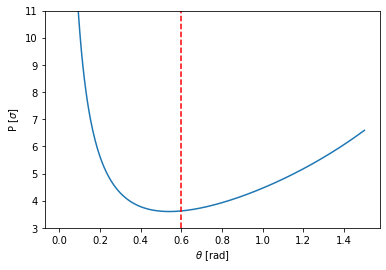

In [3]:
def func(x, n1=6, n2=7):
    return n2/np.sin(x) - n1/np.tan(x)

n1=6
n2=7
x = np.linspace(0, 1.5, 400)
y = func(x)

plt.plot(x, y)
plt.ylim(3, 11)
plt.vlines(np.sqrt(n2**2-n1**2)/n1, 3, 11, colors='r', linestyles='dashed')
plt.xlabel(r'$\theta$ [rad]')
plt.ylabel(r'P $[\sigma]$')
plt.show()

In [4]:
0.1*360/(2*np.pi)

5.729577951308232

In [5]:
mux=np.arange(0.1,4*np.pi/2,np.pi/200)
#mux=np.arange(0.01,4*np.pi/2,np.pi/200)
#np.tan(mux)

/tmp/cmaccani/ipykernel_175727/845034965.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


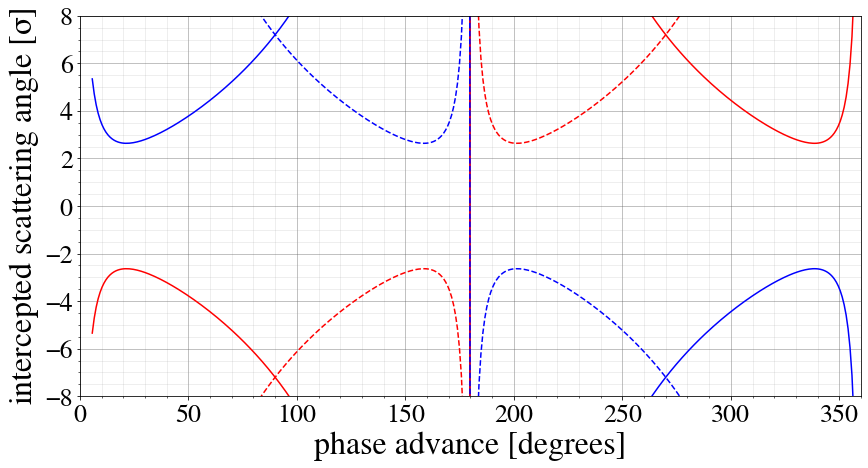

In [6]:
font = font_manager.FontProperties(family='Nimbus Roman', style='normal', size=24)
myFont = {'size': 32, 'fontname': 'Nimbus Roman'}
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Nimbus Roman'
plt.rcParams['mathtext.it'] = 'Nimbus Roman'
plt.rcParams['mathtext.bf'] = 'Nimbus Roman:bold'
axis_color = 'lightgoldenrodyellow'

n1=6.7
n2=7.2

fig, ax = plt.subplots(figsize=(14,7))
#ax.plot(mux,10.4/np.sin(mux)-6.7/np.tan(mux),color='black',linestyle='-')
ax.plot(mux*180/np.pi,-n2/np.sin(mux)-n1/np.tan(mux),color='red',linestyle='--') # LOWER JAW 1, UPPER JAW 2
ax.plot(mux*180/np.pi,n2/np.sin(mux)-n1/np.tan(mux),color='blue',linestyle='-')  # UPPER JAW 1, UPPER JAW 2
ax.plot(mux*180/np.pi,-n2/np.sin(mux)+n1/np.tan(mux),color='red',linestyle='-')  # LOWER JAW 1, LOWER JAW 2
ax.plot(mux*180/np.pi,n2/np.sin(mux)+n1/np.tan(mux),color='blue',linestyle='--') # UPPER JAW 1, LOWER JAW 2
#ax.plot(mux,13.2/np.sin(mux)-8.5/np.tan(mux),color='green',linestyle='-')

plt.ylim([-8,8])
plt.xlim([0.,360])

plt.ylabel(r'intercepted scattering angle [$\sigma$]', fontdict=myFont)
plt.xlabel('phase advance [degrees]', fontdict=myFont)
plt.yticks(font='Nimbus Roman',size=26)
plt.xticks(font='Nimbus Roman',size=26)
#plt.legend(['15cm tight','15cm relaxed','20cm relaxed'],loc='best',prop=font, ncol=2,handleheight=0, labelspacing=0.05)
plt.minorticks_on()
plt.grid( which='minor', color='#999999', linestyle='-', alpha=0.2) #b=True,
plt.grid( which='major', color='#666666', linestyle='-', alpha=0.5) #b=True,

#plt.axvline(88.7456/180*np.pi,0,17,color='black',linestyle='--') # cry1V IP5 b1
#plt.axvline(84.8528/180*np.pi,0,17,color='black',linestyle='--') # cry1V IP1 b1
##plt.axvline(16.8356/180*np.pi,0,17,color='black',linestyle='--') # cry1V IP5 b2
#plt.axvline(34.8216/180*np.pi,0,17,color='red',linestyle='--') # cry1V IP1 b2

#plt.axvline(2.1314/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP5 b1
#plt.axvline(22.8636/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP1 b1
#plt.axvline(68.4022/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP5 b2
#plt.axvline(80.6614/180*np.pi,0,17,color='black',linestyle='--') # cry1H IP1 b2

plt.axhline(9,0,350,color='black')
plt.axhline(-9,0,350,color='black')


#plt.savefig("plots/generalPerformance/phaseAdvance.png", bbox_inches='tight',facecolor='white', transparent=False, dpi=400)
fig.show()



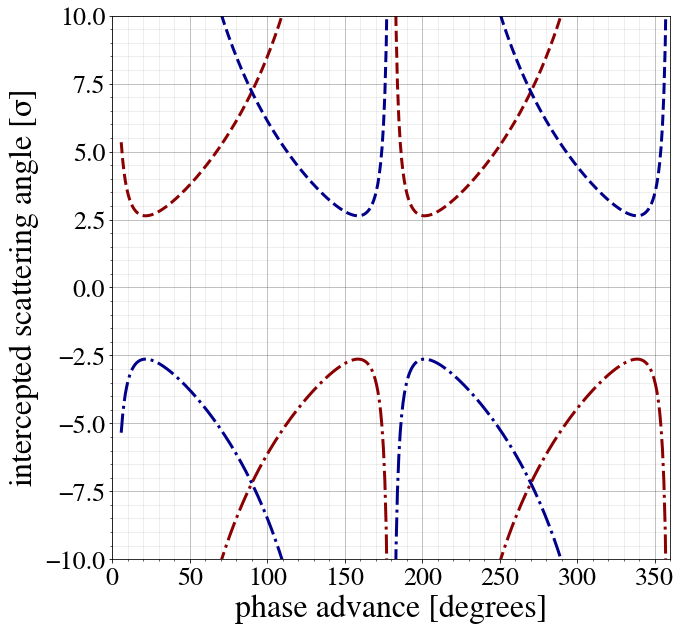

In [7]:


font = font_manager.FontProperties(family='Nimbus Roman', style='normal', size=24)
myFont = {'size': 32, 'fontname': 'Nimbus Roman'}
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Nimbus Roman'
plt.rcParams['mathtext.it'] = 'Nimbus Roman'
plt.rcParams['mathtext.bf'] = 'Nimbus Roman:bold'
axis_color = 'lightgoldenrodyellow'

n1=6.7
n2=7.2
disp=-5.8*0

theta=np.arctan(np.sqrt(n2**2-n1**2)/n1)
deltax=n2/np.sin(theta)-n1/np.tan(theta)


fig, ax = plt.subplots(figsize=(10,10))
# pos jaw pos kick
ax.plot(mux*180/np.pi,n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)-n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkred',linestyle='--',linewidth=3)

# pos jaw neg kick
ax.plot(mux*180/np.pi,-n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)-n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkred',linestyle='-.',linewidth=3)

# neg jaw pos kick
ax.plot(mux*180/np.pi,n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)+n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkblue',linestyle='--',linewidth=3)

# neg jaw neg kick
ax.plot(mux*180/np.pi,-n2/np.sin(mux-np.heaviside(mux-np.pi,1)*np.pi)+n1/np.tan(mux-np.heaviside(mux-np.pi,1)*np.pi),color='darkblue',linestyle='-.',linewidth=3)

plt.ylim([-10,10])
plt.xlim([0.,360])

plt.ylabel(r'intercepted scattering angle [$\sigma$]', fontdict=myFont)
plt.xlabel('phase advance [degrees]', fontdict=myFont)
plt.yticks(font='Nimbus Roman',size=26)
plt.xticks(font='Nimbus Roman',size=26)
#plt.legend(['15cm tight','15cm relaxed','20cm relaxed'],loc='best',prop=font, ncol=2,handleheight=0, labelspacing=0.05)
plt.minorticks_on()
plt.grid( which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.grid( which='major', color='#666666', linestyle='-', alpha=0.5)

#plt.savefig("collCut2.png", bbox_inches='tight',facecolor='white', transparent=False, dpi=400)



Optimal phase advance betweent tcp at 6.7 and cry1 at 7.2:  21.478417841081004 [deg]
Delta P betweent tcp at 6.7 and cry1 at 7.2: 2.636285265292816 [sigma]  


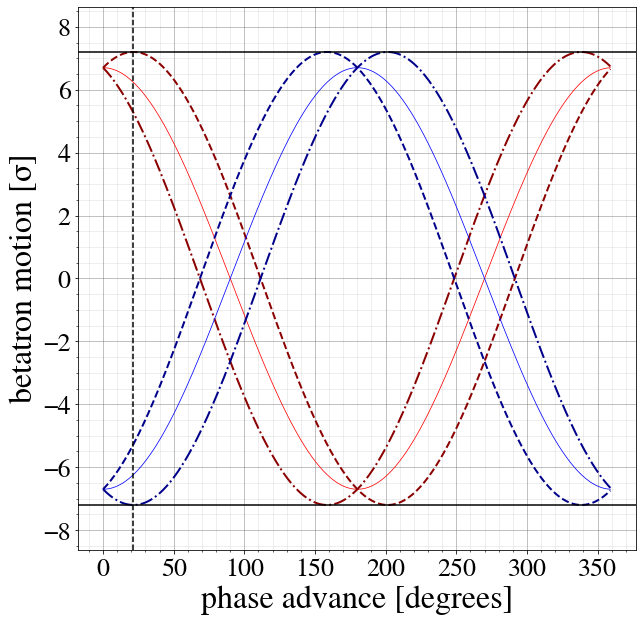

In [8]:
font = font_manager.FontProperties(family='Nimbus Roman', style='normal', size=24)
myFont = {'size': 32, 'fontname': 'Nimbus Roman'}
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Nimbus Roman'
plt.rcParams['mathtext.it'] = 'Nimbus Roman'
plt.rcParams['mathtext.bf'] = 'Nimbus Roman:bold'
axis_color = 'lightgoldenrodyellow'

fig, ax = plt.subplots(figsize=(10,10))

tcp=6.7
cry1=7.2

theta=np.arctan(np.sqrt(cry1**2-tcp**2)/tcp)
deltax=cry1/np.sin(theta)-tcp/np.tan(theta)

print(f"Optimal phase advance betweent tcp at {tcp} and cry1 at {cry1}: ", theta*180/np.pi, '[deg]')
print(f"Delta P betweent tcp at {tcp} and cry1 at {cry1}:", deltax, '[sigma]  ')

xx=np.arange(0,2*np.pi,np.pi/200)
#deltax=cry1*0.55
plt.plot(xx*180/np.pi,tcp*np.cos(xx),color='red',linewidth=0.75)                                     # trajectory without kick, upper jaw
plt.plot(xx*180/np.pi,tcp*np.cos(xx)+1*deltax*np.sin(xx),color='darkred',linestyle='--',linewidth=2) # trajectory with positive kick, upper jaw
plt.plot(xx*180/np.pi,tcp*np.cos(xx)-1*deltax*np.sin(xx),color='darkred',linestyle='-.',linewidth=2) # trajectory with negative kick, upper jaw

plt.plot(xx*180/np.pi,-tcp*np.cos(xx),color='blue',linewidth=0.75)                                   # trajectory without kick, lower jaw
plt.plot(xx*180/np.pi,-tcp*np.cos(xx)+deltax*np.sin(xx),color='darkblue',linestyle='--',linewidth=2) # trajectory with positive kick, lower jaw
plt.plot(xx*180/np.pi,-tcp*np.cos(xx)-deltax*np.sin(xx),color='darkblue',linestyle='-.',linewidth=2) # trajectory with negative kick, lower jaw
#plt.axvline( 90/180*np.pi,0,17,color='black',linestyle='--')
#plt.axvline(180/180*np.pi,0,17,color='black',linestyle='--')
#plt.axvline(270/180*np.pi,0,17,color='black',linestyle='--')
#plt.axvline(360/180*np.pi,0,17,color='black',linestyle='--')
plt.axvline(theta*180/np.pi,0,17,color='black',linestyle='--')
#plt.axvline(360-theta*180/np.pi,0,17,color='black',linestyle='--')


plt.axhline(cry1,0,17,color='black',linestyle='-')
plt.axhline(-cry1,0,17,color='black',linestyle='-')

plt.ylim([-1.2*cry1,1.2*cry1])


plt.ylabel(r'betatron motion [$\sigma$]', fontdict=myFont)
plt.xlabel('phase advance [degrees]', fontdict=myFont)
plt.yticks(font='Nimbus Roman',size=26)
plt.xticks(font='Nimbus Roman',size=26)
plt.minorticks_on()
plt.grid(which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.grid( which='major', color='#666666', linestyle='-', alpha=0.5)

#plt.savefig("betaMotion2.png", bbox_inches='tight',facecolor='white', transparent=False, dpi=400)

# Line phase advance

In [9]:
import json
import numpy as np
from pathlib import Path
import sys
import os
import yaml

import xobjects as xo
import xtrack as xt
import xpart as xp
import xcoll as xc

Functions

In [9]:
def find_axis_intercepts(x_coords, y_coords):
    x_intercepts = []
    y_intercepts = []

    for i in range(len(x_coords)):
        x1, y1 = x_coords[i], y_coords[i]
        x2, y2 = x_coords[(i + 1) % len(x_coords)], y_coords[(i + 1) % len(y_coords)]

        if x1 == x2:
        # Vertical line, no y-intercept
            y_intercept = 0.0 if x1 == x2 == 0.0 else None
        else:
            slope = (y2 - y1) / (x2 - x1)
            y_intercept = y1 - (slope * x1)

        if y1 == y2:
        # Horizontal line, no x-intercept
            x_intercept = 0.0 if y1 == y2 == 0.0 else None
        else:
            slope = (x2 - x1) / (y2 - y1)
            x_intercept = x1 - (slope * y1)

        # Check if the x-intercept is within the range of x1 and x2
        if x_intercept is not None and (x1 <= x_intercept <= x2 or x2 <= x_intercept <= x1):
            x_intercepts.append(x_intercept)

        # Check if the y-intercept is within the range of y1 and y2
        if y_intercept is not None and (y1 <= y_intercept <= y2 or y2 <= y_intercept <= y1):
            y_intercepts.append(y_intercept)

    return x_intercepts, y_intercepts



def find_bad_offset_apertures(line):
    aperture_offsets = {}
    for name, element in line.element_dict.items():
        if 'offset' in name and element.__class__.__name__.startswith('XYShift'):
            aper_name = name.split('_offset')[0]
            aperture_offsets[aper_name] = (element.dx, element.dy)

    bad_apers = {}
    for ap_name, offset in aperture_offsets.items():
        aperture_el = line.element_dict[ap_name]

        cname= aperture_el.__class__.__name__
        ap_dict = aperture_el.to_dict()

        if cname == 'LimitEllipse':
            x_min = -ap_dict['a']
            x_max = ap_dict['a']
            y_min = -ap_dict['b']
            y_max = ap_dict['b']
        elif cname == 'LimitRect':
            x_min = ap_dict['min_x']
            x_max = ap_dict['max_x']
            y_min = ap_dict['min_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitRectEllipse':
            x_min = -ap_dict['max_x']
            x_max = ap_dict['max_x']
            y_min = -ap_dict['max_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitRacetrack':
            x_min = ap_dict['min_x']
            x_max = ap_dict['max_x']
            y_min = ap_dict['min_y']
            y_max = ap_dict['max_y']
        elif cname == 'LimitPolygon':
            x_intercepts, y_intercepts = find_axis_intercepts(ap_dict['x_vertices'],
                                                            ap_dict['y_vertices'])
            x_min = min(x_intercepts)
            x_max = max(x_intercepts)
            y_min = min(y_intercepts)
            y_max = max(y_intercepts)

        tolerance = 5e-3
        """if (x_max - offset[0] < tolerance 
            or -x_min + offset[0] < tolerance 
            or y_max - offset[1] < tolerance 
            or -y_min + offset[1] < tolerance):"""
        if (offset[0] -x_max > tolerance 
            or  -offset[0] + x_min > tolerance 
            or  offset[1] - y_max > tolerance 
            or  -offset[1] + y_min > tolerance ):
                bad_apers[ap_name] = (x_min, x_max, y_min, y_max, offset[0], offset[1])

    return bad_apers

Loading

In [10]:
beam          = 2   #run_dict['beam']
plane         = "V" #run_dict['plane']
TCCS_name     = 'tccs.5r3.b2'
TCCP_name     = 'tccp.4l3.b2'
TARGET_name   = 'target.4l3.b2'
TCLA_name     = 'tcla.a5l3.b2'
TCP_name      = f"tcp.{'c' if plane=='H' else 'd'}6{'l' if beam=='1' else 'r'}7.b{beam}"
context = xo.ContextCpu(omp_num_threads='auto')

In [11]:
coll_file_RUN3 = os.path.expandvars('${HOME_TWOCRYST}/input_files/flat_top.yaml')
line_name_RUN3 = os.path.expandvars("${HOME_TWOCRYST}/input_files/flat_top_b2.json")
particle_ref_RUN3 = xp.Particles(p0c=6800e9, q0=1, mass0=xp.PROTON_MASS_EV)

In [12]:
coll_file_HL_IR7 = os.path.expandvars('${HOME_TWOCRYST}/input_files/CollDB_HL_tight_b4.data')
line_name_HL_IR7 = os.path.expandvars("${HOME_TWOCRYST}/input_files/HL_IR7_rematched/b4_sequence_patched.json")
particle_ref_HL = xp.Particles(p0c=7000e9, q0=1, mass0=xp.PROTON_MASS_EV)

In [13]:
coll_file_HL_IR7_IR3 = os.path.expandvars('${HOME_TWOCRYST}/input_files/CollDB_HL_tight_b4.data')
line_name_HL_IR7_IR3 = os.path.expandvars("${HOME_TWOCRYST}/input_files/HL_IR7_IR3_rematched/b4_sequence_patched.json")
particle_ref_HL= xp.Particles(p0c=7000e9, q0=1, mass0=xp.PROTON_MASS_EV)

In [14]:
import io

def load_colldb_new(filename):
    with open(filename, "r") as infile:
        coll_data_string = ""
        family_settings = {}
        family_types = {}
        onesided = {}
        tilted = {}
        bend = {}
        xdim = {}
        ydim = {}

        for l_no, line in enumerate(infile):
            if line.startswith("#"):
                continue  # Comment
            if len(line.strip()) == 0:
                continue  # Empty line
            sline = line.split()
            if len(sline) < 6 or sline[0].lower() == "crystal" or sline[0].lower() == "target":
                if sline[0].lower() == "nsig_fam":
                    family_settings[sline[1]] = sline[2]
                    family_types[sline[1]] = sline[3]
                elif sline[0].lower() == "onesided":
                    onesided[sline[1]] = int(sline[2])
                elif sline[0].lower() == "tilted":
                    tilted[sline[1]] = [float(sline[2]), float(sline[3])]
                elif sline[0].lower() == "crystal":
                    bend[sline[1]] = float(sline[2])
                    xdim[sline[1]] = float(sline[3])
                    ydim[sline[1]] = float(sline[4])
                elif sline[0].lower() == "target":
                    xdim[sline[1]] = float(sline[2])
                    ydim[sline[1]] = float(sline[3])
                elif sline[0].lower() == "settings":
                    pass  # Acknowledge and ignore this line
                else:
                    raise ValueError(f"Unknown setting {line}")
            else:
                coll_data_string += line

    names = ["name", "opening", "material", "length", "angle", "offset"]

    df = pd.read_csv(io.StringIO(coll_data_string), delim_whitespace=True,
                     index_col=False, skip_blank_lines=True, names=names)

    df["angle"] = df["angle"] 
    df["name"] = df["name"].str.lower() # Make the names lowercase for easy processing
    df["nsigma"] = df["opening"].apply(lambda s: float(family_settings.get(s, s)))
    df["type"] = df["opening"].apply(lambda s: family_types.get(s, "UNKNOWN"))
    df["side"] = df["name"].apply(lambda s: onesided.get(s, 0))
    df["bend"] = df["name"].apply(lambda s: bend.get(s, 0))
    df["xdim"] = df["name"].apply(lambda s: xdim.get(s, 0))
    df["ydim"] = df["name"].apply(lambda s: ydim.get(s, 0))
    df["tilt_left"] = df["name"].apply(lambda s: np.deg2rad(tilted.get(s, [0, 0])[0]))
    df["tilt_right"] = df["name"].apply(lambda s: np.deg2rad(tilted.get(s, [0, 0])[1]))
    df = df.set_index("name").T

    # Ensure the collimators marked as one-sided or tilted are actually defined
    defined_set = set(df.columns) # The data fram was transposed so columns are names
    onesided_set = set(onesided.keys())
    tilted_set = set(tilted.keys())
    if not onesided_set.issubset(defined_set):
        different = onesided_set - defined_set
        raise SystemExit('One-sided collimators not defined: {}'.format(", ".join(different)))
    if not tilted_set.issubset(defined_set):
        different = tilted_set - defined_set
        raise SystemExit('Tilted collimators not defined: {}'.format(",".join(different)))
    return df.T

In [15]:
def load_line(line_name, coll_file, particle_ref):
    if coll_file.endswith('.yaml'):
        with open(coll_file, 'r') as stream:
            coll_dict = yaml.safe_load(stream)['collimators'][f'b{beam}']
    if coll_file.endswith('.data'):
        coll_dict = load_colldb_new(coll_file).to_dict('index')


    # Load from json
    line = xt.Line.from_json(line_name)
    line.particle_ref = particle_ref

    end_s = line.get_length()

    TCCS_loc = end_s - 6773.7 #6775
    TCCP_loc = end_s - 6653.3 #6655
    TARGET_loc = end_s - (6653.3 + coll_dict[TCCP_name]["length"]/2 + coll_dict[TARGET_name]["length"]/2)

    line.insert_element(at_s=TCCS_loc, element=xt.Marker(), name='tccs.5r3.b2')
    line.insert_element(at_s=TCCS_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccs.5r3.b2_aper')
    line.insert_element(at_s=TCCP_loc, element=xt.Marker(), name='tccp.4l3.b2')
    line.insert_element(at_s=TCCP_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='tccp.4l3.b2_aper')
    line.insert_element(at_s=TARGET_loc, element=xt.Marker(), name='target.4l3.b2')
    line.insert_element(at_s=TARGET_loc, element=xt.LimitEllipse(a_squ=0.0016, b_squ=0.0016, a_b_squ=2.56e-06), name='target.4l3.b2_aper')


    bad_aper = find_bad_offset_apertures(line)
    print('Bad apertures : ', bad_aper)
    print('Replace bad apertures with Marker')
    for name in bad_aper.keys():
        line.element_dict[name] = xt.Marker()
        print(name, line.get_s_position(name), line.element_dict[name])

    return line

In [16]:
tw_HL_IR7 = load_line(line_name_HL_IR7, coll_file_HL_IR7, particle_ref_HL).twiss(method='4d').to_pandas()

Done loading line from dict.           
Bad apertures :  {}
Replace bad apertures with Marker
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


In [17]:
tw_HL_IR7_IR3 = load_line(line_name_HL_IR7_IR3, coll_file_HL_IR7_IR3, particle_ref_HL).twiss(method='4d').to_pandas()

Done loading line from dict.           
Bad apertures :  {}
Replace bad apertures with Marker
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `only_xtrack_frozen_energy`.


In [18]:
tw_RUN3 = load_line(line_name_RUN3, coll_file_RUN3, particle_ref_RUN3).twiss().to_pandas()

Done loading line from dict.           
Bad apertures :  {'tctph.4r8.a.b2_aper': (-0.04, 0.04, -0.04, 0.04, 0.16672558295218318, -0.0), 'vmabc.4l2.b.b2_aper': (-0.0315, 0.0315, -0.0315, 0.0315, -0.18383135991897473, -0.0)}
Replace bad apertures with Marker
tctph.4r8.a.b2_aper 3461.1485832278486 Marker(_dummy=0)
vmabc.4l2.b.b2_aper 23206.82195866583 Marker(_dummy=0)
Found suitable prebuilt kernel `default_only_xtrack`.


In [19]:
def calculate_delta_phase_adv(tw):
    return (float(tw[tw.name == TCCS_name]['muy'])% 1* 2*np.pi - float(tw[tw.name == TCP_name]['muy'])% 1* 2*np.pi)*180/np.pi

In [20]:
def calculate_optimal_phase_adv(n1, n2):
    return np.arctan(np.sqrt(n2**2-n1**2)/n1)*180/np.pi

In [21]:
print('Run3: \nfrom twiss: ', calculate_delta_phase_adv(tw_RUN3), '\tfirst optimum: ', calculate_optimal_phase_adv(5, 5.5), '\tsecond optimum: ',  180- calculate_optimal_phase_adv(5, 5.5))
print('\nHL rematched IR7: \nfrom twiss: ', calculate_delta_phase_adv(tw_HL_IR7), '\tfirst optimum: ', calculate_optimal_phase_adv(6.7, 7.2),  '\tsecond optimum: ', 180- calculate_optimal_phase_adv(6.7, 7.2))
print('\nHL rematched IR7 and IR3: \nfrom twiss: ', calculate_delta_phase_adv(tw_HL_IR7_IR3), '\tfirst optimum: ', calculate_optimal_phase_adv(6.7, 7.2),  '\tsecond optimum: ', 180- calculate_optimal_phase_adv(6.7, 7.2))

Run3: 
from twiss:  173.97026540976458 	first optimum:  24.6199773286571 	second optimum:  155.38002267134289

HL rematched IR7: 
from twiss:  150.78126328722277 	first optimum:  21.478417841081004 	second optimum:  158.521582158919

HL rematched IR7 and IR3: 
from twiss:  130.31930415659858 	first optimum:  21.478417841081004 	second optimum:  158.521582158919


<Axes: >

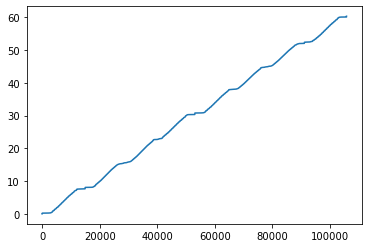

In [22]:
tw_RUN3.muy.plot()

In [23]:
(float(tw_RUN3[tw_RUN3.name == TCCS_name]['muy']) % 1) * 2*np.pi

4.676135957010215

Test Load Collimators

In [24]:
df = load_colldb_new(coll_file_HL_IR7)

In [25]:
#df['angle_deg'] = df['angle']*180/np.pi
df.sort_values('opening')

,opening,material,length,angle,offset,nsigma,type,side,bend,xdim,ydim,tilt_left,tilt_right
name,,,,,,,,,,,,,
target.4l3.b2,target3,Iner,0.005,90.0,0.0,15.0,SPECIAL,1,0.0,0.002,0.004,0.0,0.0
tccp.4l3.b2,tccp3,Si,0.07,90.0,0.0,15.0,SPECIAL,1,10.0,0.002,0.004,0.0,0.0
tccs.5r3.b2,tccs3,Si,0.004,90.0,0.0,7.2,SPECIAL,1,80.0,0.002,0.035,0.0,0.0
tcdqa.c4l6.b2,tcdq,C,3.0,0.0,0.0,10.1,TERTIARY,1,0.0,0.0,0.0,0.0,0.0
tcdqa.a4l6.b2,tcdq,C,3.0,0.0,0.0,10.1,TERTIARY,1,0.0,0.0,0.0,0.0,0.0
tcdqa.b4l6.b2,tcdq,C,3.0,0.0,0.0,10.1,TERTIARY,1,0.0,0.0,0.0,0.0,0.0
tcla.7l3.b2,tcla3,Iner,1.0,0.0,0.0,23.7,TERTIARY,0,0.0,0.0,0.0,0.0,0.0
tcla.a5l3.b2,tcla3,Iner,1.0,90.0,0.0,23.7,TERTIARY,0,0.0,0.0,0.0,0.0,0.0
tcla.b5l3.b2,tcla3,Iner,1.0,0.0,0.0,23.7,TERTIARY,0,0.0,0.0,0.0,0.0,0.0


In [26]:
colldb_test_SixTrack= xc.CollimatorDatabase.from_SixTrack(coll_file_HL_IR7, nemitt_y=2.5e-6, nemitt_x=2.5e-6)

In [27]:
colldb_test_SixTrack._colldb.keys()

Index(['material', 'active_length', 'stage', 'offset', 'parking', 'bend',
       'xdim', 'ydim', 'miscut', 'thick', 'side', 'crystal', 'family', 'gap_L',
       'gap_R', 'angle_L', 'angle_R', 's_center', 'align_to', 's_align_front',
       's_align_back', 'jaw_LU', 'jaw_RU', 'jaw_LD', 'jaw_RD',
       'overwritten_keys', 'collimator_type', 'active', 'inactive_front',
       'inactive_back', 'sigmax', 'sigmay'],
      dtype='object')

In [28]:
colldb_test_Yaml= xc.CollimatorDatabase.from_yaml(coll_file_RUN3, beam=2)

In [29]:
colldb_test_Yaml._colldb

,parking,stage,material,family,active_length,gap_L,gap_R,angle_L,angle_R,s_center,...,inactive_front,inactive_back,sigmax,sigmay,crystal,bend,xdim,ydim,miscut,thick
tcl.4l1.b2,0.025,tertiary,cu,tcl4,1,None,None,0,0,None,...,0,0,None,None,None,None,0,0,0,0
tcl.5l1.b2,0.025,tertiary,cu,tcl5,1,None,None,0,0,None,...,0,0,None,None,None,None,0,0,0,0
tcl.6l1.b2,0.025,tertiary,iner,tcl6,1,None,None,0,0,None,...,0,0,None,None,None,None,0,0,0,0
tctph.4r8.b2,0.025,tertiary,iner,tct8,1,18.0,18.0,0,0,None,...,0,0,None,None,None,None,0,0,0,0
tctpv.4r8.b2,0.025,tertiary,iner,tct8,1,18.0,18.0,90,90,None,...,0,0,None,None,None,None,0,0,0,0
tdisa.a4r8.b2,0.025,tertiary,cu,tdi,1.565,None,None,90,90,None,...,0,0,None,None,None,None,0,0,0,0
tdisb.a4r8.b2,0.025,tertiary,cu,tdi,1.565,None,None,90,90,None,...,0,0,None,None,None,None,0,0,0,0
tdisc.a4r8.b2,0.025,tertiary,cu,tdi,1.565,None,None,90,90,None,...,0,0,None,None,None,None,0,0,0,0
tclia.4l8,0.025,tertiary,c,tcli,1,None,None,90,90,None,...,0,0,None,None,None,None,0,0,0,0
tclib.6l8.b2,0.025,tertiary,c,tcli,1,None,None,90,90,None,...,0,0,None,None,None,None,0,0,0,0


### Patched line

In [30]:
#line_name_HL_IR7_patched = os.path.expandvars("${HOME_TWOCRYST}/input_files/HL_IR7_rematched/b4_sequence_patched.json")
#line_name_HL_IR7_IR3_patched = os.path.expandvars("${HOME_TWOCRYST}/input_files/HL_IR7_IR3_rematched/b4_sequence_patched.json")

In [31]:
#line = load_line(line_name_HL_IR7_IR3, coll_file, particle_ref_HL)
#line = load_line(line_name_HL_IR7_patched, coll_file, particle_ref_HL)
line = load_line(line_name_HL_IR7_IR3, coll_file_HL_IR7_IR3, particle_ref_HL)

Done loading line from dict.           
Bad apertures :  {}
Replace bad apertures with Marker


In [32]:
line.get_elements_of_type(xt.Cavity)[1]

['acsca.d5r4.b2',
 'acsca.c5r4.b2',
 'acsca.b5r4.b2',
 'acsca.a5r4.b2',
 'acsca.a5l4.b2',
 'acsca.b5l4.b2',
 'acsca.c5l4.b2',
 'acsca.d5l4.b2']

In [33]:
speed = line.particle_ref._xobject.beta0[0]*scipy.constants.c
harmonic_number = 35640
voltage = 12e6/len(line.get_elements_of_type(xt.Cavity)[1])
frequency = harmonic_number * speed /line.get_length()

for side in ['l', 'r']:
    for cell in ['a','b','c','d']:
        line[f'acsca.{cell}5{side}4.b2'].voltage = voltage
        line[f'acsca.{cell}5{side}4.b2'].frequency = frequency

In [34]:
line.get_elements_of_type(xt.Cavity)[0]

[Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0),
 Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0),
 Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0),
 Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0),
 Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0),
 Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0),
 Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0),
 Cavity(voltage=1500000.0, frequency=400789599.4145092, lag=180.0, lag_taper=0.0)]

In [35]:
# Aperture model check
print('\nAperture model check on imported model:')
df_imported = line.check_aperture()
assert not np.any(df_imported.has_aperture_problem)


# Initialise collmanager
coll_manager = xc.CollimatorManager.from_SixTrack(coll_file_HL_IR7_IR3, line=line, beam=2, _context=context, ignore_crystals=False, nemitt_x = 2.5e-6,  nemitt_y = 2.5e-6)


coll_names = coll_manager.collimator_names
# black_absorbers = []
# everest_colls = [name for name in coll_names if name not in black_absorbers]
# coll_manager.install_everest_collimators(names=everest_colls,verbose=True)
coll_manager.install_everest_collimators()
# coll_manager.install_black_absorbers(names = black_absorbers, verbose=True)



# Aperture model check
print('\nAperture model check after introducing collimators:')
df_with_coll = line.check_aperture()
assert not np.any(df_with_coll.has_aperture_problem)

    
# Build the tracker
coll_manager.build_tracker()



Aperture model check on imported model:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.

Aperture model check after introducing collimators:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [36]:
# line.twiss(method='4d')

# Set the collimator openings based on the colldb,
# or manually override with the option gaps={collname: gap}
coll_manager.set_openings()

# Aperture model check
print('\nAperture model check after introducing collimators:')
df_with_coll = line.check_aperture()
assert not np.any(df_with_coll.has_aperture_problem)

Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


/cvmfs/sft.cern.ch/lcg/views/LCG_104a/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in minimum
  result = getattr(ufunc, method)(*inputs, **kwargs)
/cvmfs/sft.cern.ch/lcg/views/LCG_104a/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in minimum
  result = getattr(ufunc, method)(*inputs, **kwargs)



Aperture model check after introducing collimators:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]


In [37]:
plane = "V"
beam = 2
num_particles = 5
num_turns = 2
# Generate initial pencil distribution on horizontal collimator
tcp  = f"tcp.{'c' if plane=='H' else 'd'}6{'l' if beam=='1' else 'r'}7.b{beam}"
part = coll_manager.generate_pencil_on_collimator(tcp, num_particles=num_particles)


# Optimise the line
#line.optimize_for_tracking()
idx = line.element_names.index(tcp)
part.at_element = idx
part.start_tracking_at_element = idx


# Track
coll_manager.enable_scattering()
line.track(part, num_turns=num_turns, time=True)
coll_manager.disable_scattering()
print(f"Done tracking in {line.time_last_track:.1f}s.")


# Save lossmap to json, which can be loaded, combined (for more statistics),
# and plotted with the 'lossmaps' package
_ = coll_manager.lossmap(part)



# Save a summary of the collimator losses to a text file
summary = coll_manager.summary(part) #, file=Path(path_out,f'coll_summary_B{beam}{plane}.out')
print(summary)

Collimator tcp.d6r7.b2 is diverging.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Done tracking in 0.0s.
Empty DataFrame
Columns: [collname, nabs, length, s, type]
Index: []


/afs/cern.ch/user/c/cmaccani/xsuite/xcoll/xcoll/manager.py:760: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  nabs         = [coll_weights[coll_losses==nn].sum() for nn in self.collimator_names]


###  Aperture problem

In [52]:
line_name_HL_IR7_original = os.path.expandvars("${HOME_TWOCRYST}/input_files/HL_IR7_rematched/b4_sequence.json")
line = load_line(line_name_HL_IR7_original, coll_file_HL_IR7, particle_ref_HL)

# Aperture model check
print('\nAperture model check on imported model:')
df_imported = line.check_aperture()
assert not np.any(df_imported.has_aperture_problem)


# Initialise collmanager
coll_manager = xc.CollimatorManager.from_SixTrack(coll_file_HL_IR7, line=line, beam=2, _context=context, ignore_crystals=False, nemitt_x = 2.5e-6,  nemitt_y = 2.5e-6)


coll_names = coll_manager.collimator_names
coll_manager.install_everest_collimators()

# Aperture model check
print('\nAperture model check after introducing collimators:')
df_with_coll = line.check_aperture()
assert not np.any(df_with_coll.has_aperture_problem)

Done loading line from dict.           
Bad apertures :  {}
Replace bad apertures with Marker

Aperture model check on imported model:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
0 thick elements miss associated aperture (upstream or downstream):
[]

Aperture model check after introducing collimators:
Done checking aperture.           
0 thin elements miss associated aperture (upstream):
[]
8 thick elements miss associated aperture (upstream or downstream):
['tdisa.a4r8.b2',
 'tdisb.a4r8.b2',
 'tdisc.a4r8.b2',
 'tcspm.b4r7.b2',
 'tcspm.e5l7.b2',
 'tcspm.6l7.b2',
 'tcld.9l7.b2',
 'tcld.a11l2.b2']


AssertionError: 

In [53]:
problematic_colls=['tdisa.a4r8.b2', 'tdisb.a4r8.b2', 'tdisc.a4r8.b2', 'tcspm.b4r7.b2', 'tcspm.e5l7.b2', 'tcspm.6l7.b2', 'tcld.9l7.b2', 'tcld.a11l2.b2']

In [54]:
#problematic_colls_IR7_IR3 = problematic_colls
#problematic_colls_IR7 = ['tdisa.a4r8.b2',
# 'tdisb.a4r8.b2',
# 'tdisc.a4r8.b2',
# 'tcspm.b4r7.b2',
# 'tcspm.e5l7.b2',
# 'tcspm.6l7.b2',
# 'tcld.9l7.b2',
# 'tcld.a11l2.b2']
#problematic_colls_IR7 == problematic_colls_IR7_IR3

In [55]:
df[df.index.isin(problematic_colls)]

,opening,material,length,angle,offset,nsigma,type,side,bend,xdim,ydim,tilt_left,tilt_right
name,,,,,,,,,,,,,
tdisa.a4r8.b2,tdi,CU,1.565,90.0,0.0,999.0,TERTIARY,0,0.0,0.0,0.0,0.0,0.0
tdisb.a4r8.b2,tdi,CU,1.565,90.0,0.0,999.0,TERTIARY,0,0.0,0.0,0.0,0.0,0.0
tdisc.a4r8.b2,tdi,CU,1.565,90.0,0.0,999.0,TERTIARY,0,0.0,0.0,0.0,0.0,0.0
tcld.a11l2.b2,tcryo,Iner,0.6,0.0,0.0,999.0,TERTIARY,0,0.0,0.0,0.0,0.0,0.0
tcspm.b4r7.b2,tcsg7,MoGR,1.0,0.0,0.0,9.1,SECONDARY,0,0.0,0.0,0.0,0.0,0.0
tcspm.e5l7.b2,tcsg7,MoGR,1.0,130.499732,0.0,9.1,SECONDARY,0,0.0,0.0,0.0,0.0,0.0
tcspm.6l7.b2,tcsg7,MoGR,1.0,0.500192,0.0,9.1,SECONDARY,0,0.0,0.0,0.0,0.0,0.0
tcld.9l7.b2,tcryo,Iner,0.6,0.0,0.0,999.0,TERTIARY,0,0.0,0.0,0.0,0.0,0.0


In [56]:
#problematic_colls = ['tctpxv.4r1.b2',  'tcla.c6l7.b2', TCCS_name]
for coll in problematic_colls:
    if coll in line.element_names:
        idx = line.element_names.index(coll)
        print(line.element_names[idx-1], line[idx-1])
        print('\n')
        print(coll, line[idx])
        print('\n')
        print(line.element_names[idx+1], line[idx+1])
        print('\n------------------------- \n')

drift_3422_u Drift(length=4.8203219193965197e-11)


tdisa.a4r8.b2 EverestCollimator(inactive_front=0.0, active_length=1.565, inactive_back=0.0, jaw_L=1.0, jaw_R=-1.0, ref_x=0.0, ref_y=0.0, sin_zL=1.0, cos_zL=6.123233995736766e-17, sin_zR=1.0, cos_zR=6.123233995736766e-17, sin_yL=0.0, cos_yL=1.0, tan_yL=1.0, sin_yR=0.0, cos_yR=1.0, tan_yR=1.0, _side=0, active=0, _internal_record_id=RecordIdentifier(buffer_id=0, offset=0), _material=Material(Z=29.0, A=63.55, density=8.96, excitation_energy=3.22e-07, nuclear_radius=0.366, nuclear_elastic_slope=217.8, cross_section=[1.253   0.769   0.      0.      0.      0.00153], hcut=0.01, name=Copper, radiation_length=0.0143), rutherford_rng=RandomRutherford(lower_val=0.0009982, upper_val=0.01, A=0.0014570268637181245, B=114.6797316, Newton_iterations=7), _tracking=0)


drift_3424_d Drift(length=0.014999999951669452)

------------------------- 

drift_3425_u Drift(length=4.8203219193965197e-11)


tdisb.a4r8.b2 EverestCollimator(inactive_front=0.0, acti

In [57]:
#problematic_colls = ['tctpxv.4r1.b2',  'tcla.c6l7.b2']
for elem in line.element_names:
    for coll in problematic_colls:
        if elem.startswith(coll) and elem.endswith('_aper'):
            idx = line.element_names.index(elem)
            print(elem, line[idx])
            print('\n')

In [58]:
def find_element_backwards(lst, start_index):
    for i in range(start_index, -1, -1):
        if lst[i].endswith('_aper'):
            return lst[i]
    return None

def find_element_forward(lst, start_index):
    for i in range(start_index, len(lst)):
        if lst[i].endswith('_aper'):
            return lst[i]
    return None  # If no matching element is found



#problematic_colls = ['tctpxv.4r1.b2',  'tcla.c6l7.b2']
for coll in problematic_colls:
    if coll in line.element_names:
        idx = line.element_names.index(coll)
        aper_before = find_element_backwards(line.element_names, idx)
        idx_aper_before =  line.element_names.index(aper_before)
        aper_after = find_element_forward(line.element_names, idx)
        idx_aper_after =  line.element_names.index(aper_after)
        print(coll)
        print('Aperture before: ', aper_before, line[idx_aper_before])
        print('Aperture after: ',aper_after, line[idx_aper_after])
        print('\n------------------------- \n')

tdisa.a4r8.b2
Aperture before:  vmbgd.4r8.d.b2_aper LimitRectEllipse(max_x=0.10635, max_y=0.10635, a_squ=0.0113103225, b_squ=0.0113103225, a_b_squ=0.00012792339505400627)
Aperture after:  vmbgc.4r8.a.b2_aper LimitRectEllipse(max_x=0.10635, max_y=0.10635, a_squ=0.0113103225, b_squ=0.0113103225, a_b_squ=0.00012792339505400627)

------------------------- 

tdisb.a4r8.b2
Aperture before:  vmbgd.4r8.d.b2_aper LimitRectEllipse(max_x=0.10635, max_y=0.10635, a_squ=0.0113103225, b_squ=0.0113103225, a_b_squ=0.00012792339505400627)
Aperture after:  vmbgc.4r8.a.b2_aper LimitRectEllipse(max_x=0.10635, max_y=0.10635, a_squ=0.0113103225, b_squ=0.0113103225, a_b_squ=0.00012792339505400627)

------------------------- 

tdisc.a4r8.b2
Aperture before:  vmbgd.4r8.d.b2_aper LimitRectEllipse(max_x=0.10635, max_y=0.10635, a_squ=0.0113103225, b_squ=0.0113103225, a_b_squ=0.00012792339505400627)
Aperture after:  vmbgc.4r8.a.b2_aper LimitRectEllipse(max_x=0.10635, max_y=0.10635, a_squ=0.0113103225, b_squ=0.01131

In [59]:
#line = load_line(line_name_RUN3, coll_file_RUN3, particle_ref_RUN3)
#apers = ['tdisa.a4r8.a.b2_aper', 'tcspm.6l7.a.b2_aper']

#for aper in apers:
#    idx = line.element_names.index(aper)
#    print(aper, line[idx])
